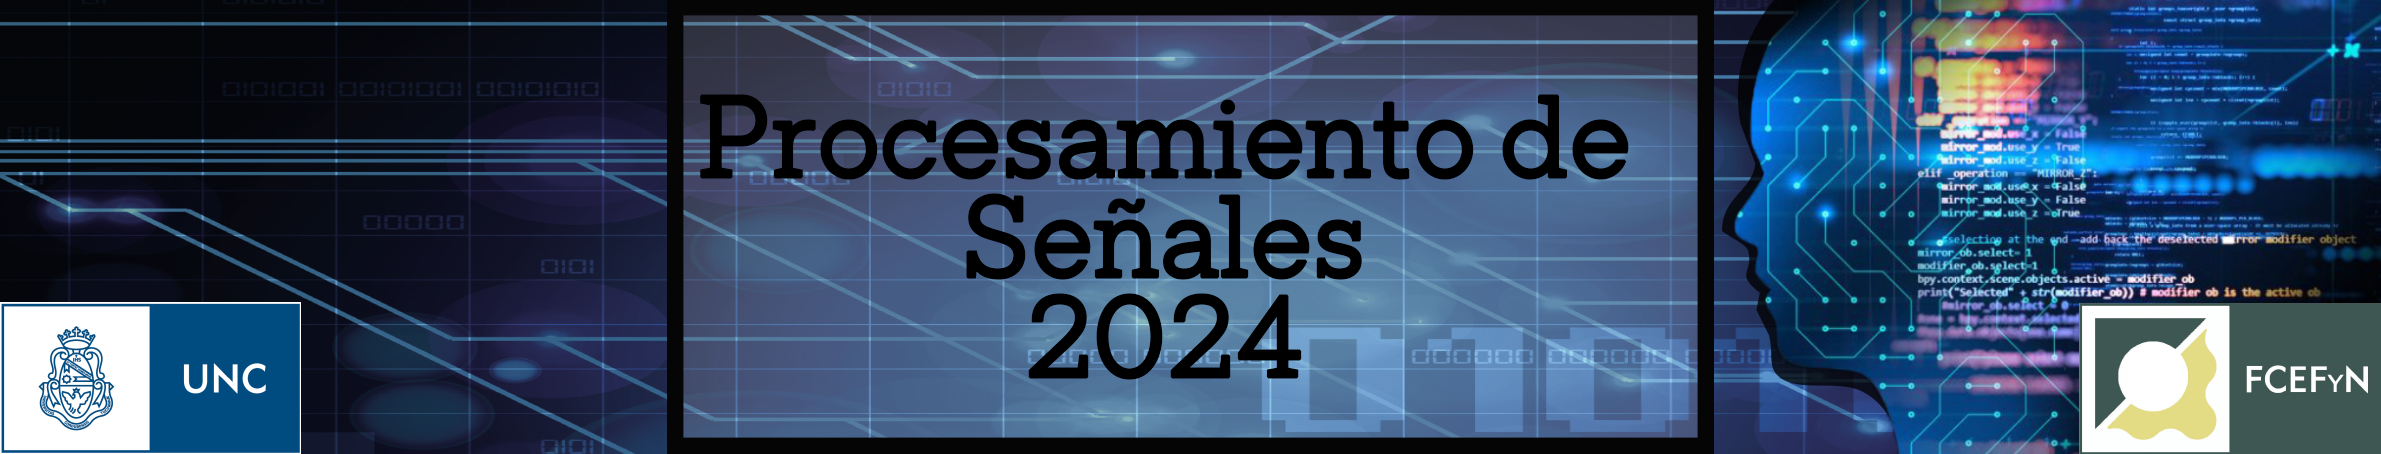

## **Laboratorio 2**

## Objetivos de la clase:
Ver los siguientes temas:
* Transformada de Fourier Discreta **DFT** punto N
* Análisis en frecuencia de una señal.
* Convolución circular punto N, Convolución lineal discreta.


## Librerías necesarias para llevar a cabo nuestros objetivos.



In [1]:
import numpy as np    # siempre la usaremos
import matplotlib.pyplot as plt #sublibrería para graficar

from scipy import signal #para convolución lineal
#from scipy.fftpack import fft,fftshift,ifft #funciones para trabajar con la Transf. de Fourier
from scipy.fftpack import fft,fftshift,ifft,fftfreq #funciones p/trabajar con la Transf. de Fourier

# Ej.1 (frec y DFT.N)

Dadas las señales $x(t)=sen(2\pi t)$ y $s(t)= 2 \cos(14 \pi t)$ con $t \in [0, 5)$, tiempo medido en segundos.

a) Muestree y digitalice las señales $x$ y $s$ en el intervalo de tiempo $[0, 5)$ con $100$ muestras por segundo igualmente espaciadas.

b) Obtenga la frecuencia de muestreo y la frecuencia de Nyquist. Además, analice las componentes de frecuencia de cada una de ellas.


In [3]:
#x tiene una componente de frecuencia de valor 1.
#s tiene una componente de frecuencia de valor 7.

#digitalizamos

#Frecuencia de muestreo en Hertz = cant. de muestras:
fm= 100
Nm= fm//2
M = fm*5
# The “//” operator is used to return the closest integer value which is less 
# than or equal to a specified expression or value.
print('La frecuencia de Nyquist de muestreo: ', Nm)
#Si la frecuencia de muestreo es de 100 Hrtz por segundo,
#quiere decir que mi señal tiene 100 muestras en el intrevalo [0,1), siendo 500 muestras en el intervalo [0,5).

#pues son 100 por segundo
pm= 1/fm #período de muestreo
tn=np.linspace(0,5,M, endpoint=False)
print(len(tn))
#print(tn[2])
x=np.sin(2*np.pi*tn)
s=2*np.cos(14*np.pi*tn)
print(M, " cant de muestras")

La frecuencia de Nyquist de muestreo:  50
500
500  cant de muestras


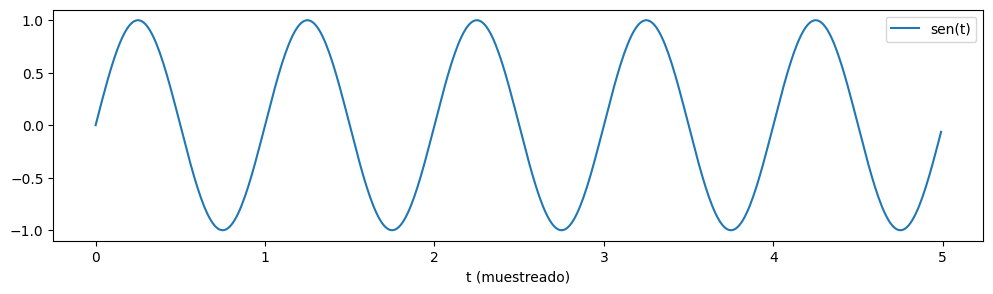

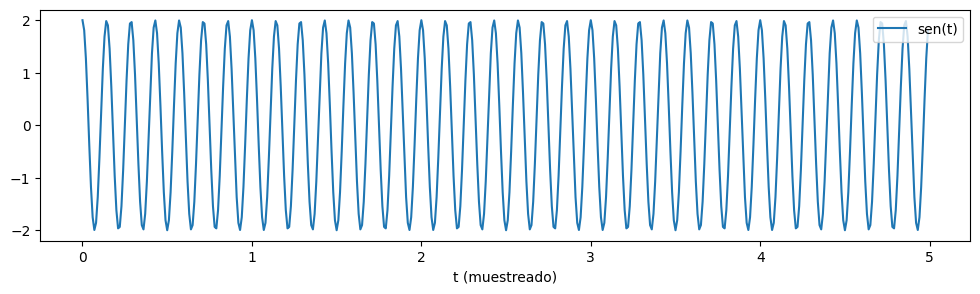

In [4]:
plt.figure(figsize=(12,3))
plt.plot(tn,x, label='sen(t)')
plt.xlabel('t (muestreado)')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(tn,s, label='sen(t)')
plt.xlabel('t (muestreado)')
plt.legend(loc='upper right')
plt.show()

## Transformada Discreta de Fourier.

Como vieron en el Teórico la DFT se define como:
$X[k]= \sum_{n=0}^{N-1} x[n] e^{-j \frac{2 \pi}{N}kn}$ con $k= 0, \dots, N-1$.

$N$ es la cantidad de muestras utilizadas de la señal.

$X$ es la DFT punto N.

Cuando N=M (cantidad de muestras de la señal) este proceso es inversible, es decir podemos recuperar la señal original bajo ciertas circunstancias.

Observar que podemos calcular la DFT punto $N$, con  un natural cualquiera, $N>M$ o $N< M$ por ejemplo. Pero esto nos puede generar algunos problemas. ¿Cuáles?

## c) DFT.N y subplot
Calcular la Trasformada de Fourier Discreta punto N=500 de $s$ y analizar los resultados. Además, graficar la señal $s$ y considerando que la DFT.N es compleja grafique la parte real e imaginaria y el módulo (valor absoluto) de la misma.

### Observación En general se analiza el módulo de la DFT .N.

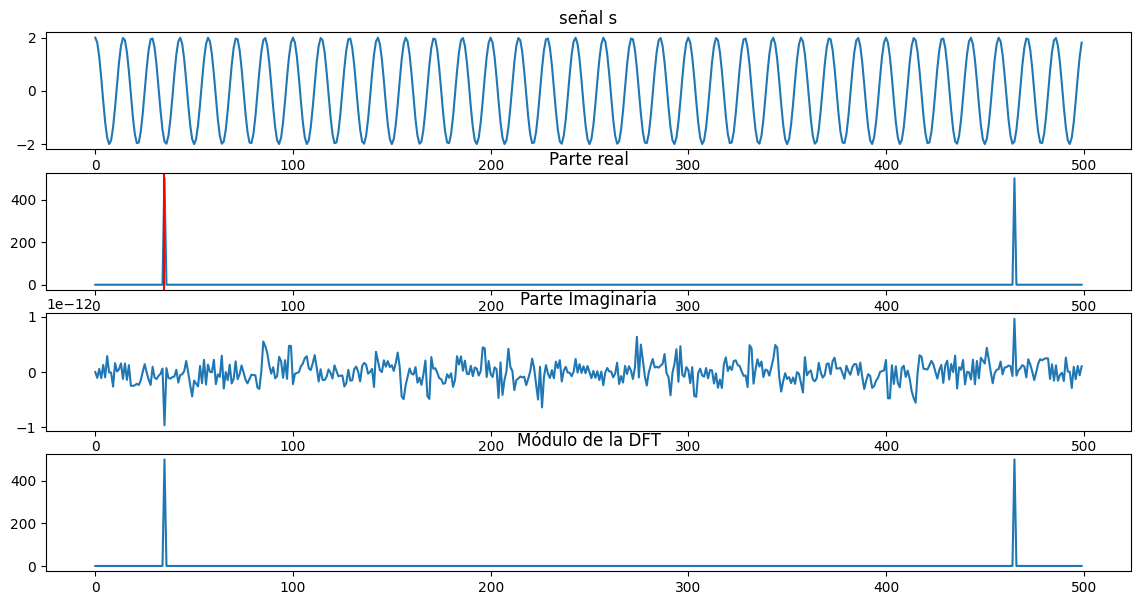

In [9]:
#DFT
fm= 100
N= 500 #cantidad de muestras
#N=M
Nm= fm//2 #Frecuencia de Nyquist
TFs=fft(s,N) #dft.n con 500 muestras

plt.figure(figsize=(14,7))

plt.subplot(411)
plt.plot(s)
plt.xlabel('n')
plt.title('señal s')

plt.subplot(412)
plt.plot(np.real(TFs))
plt.xlabel('n')abs(
plt.axvline(35, color='red')
plt.title('Parte real')

plt.subplot(413)
plt.plot(np.imag(TFs))
plt.xlabel('n')
plt.title('Parte Imaginaria')
plt.subplot(414)

plt.plot(abs(TFs)) #el módulo de la transformada
plt.title('Módulo de la DFT')
plt.show()

<p style="color: red">?? ¿Por qué vemos por separado la parte real de la imaginaria y del valor absoluto?</p>

## **Analicemos**

La señal $s$ tiene 1 componente de frecuencia en 7 Hertz (oscila 7 veces en 100 muestras).

¿Cuántas veces oscila en N=500 muestras?

    Si en 100 veces ----- 7 veces

    en 500 veces ---- x = 35 veces

¿Dónde aparece "el pico" en la DFT.N?

    Se observa que el pico aparece en 35 Hz

Notar que en este caso (por ser una señal cos) la parte imaginaria es mas que nada ruido (son valores muy pequeños) y la parte real conicide con el modulo)

De la gráfica del módulo de la DFT vemos que tenemos una componente de frecuencia. Lo mismo va a ocurrir para la señal $x$.

Tarea.

$x$ oscila 1 vez en 100 mestras entonces
en 500 muestras oscila 5 veces

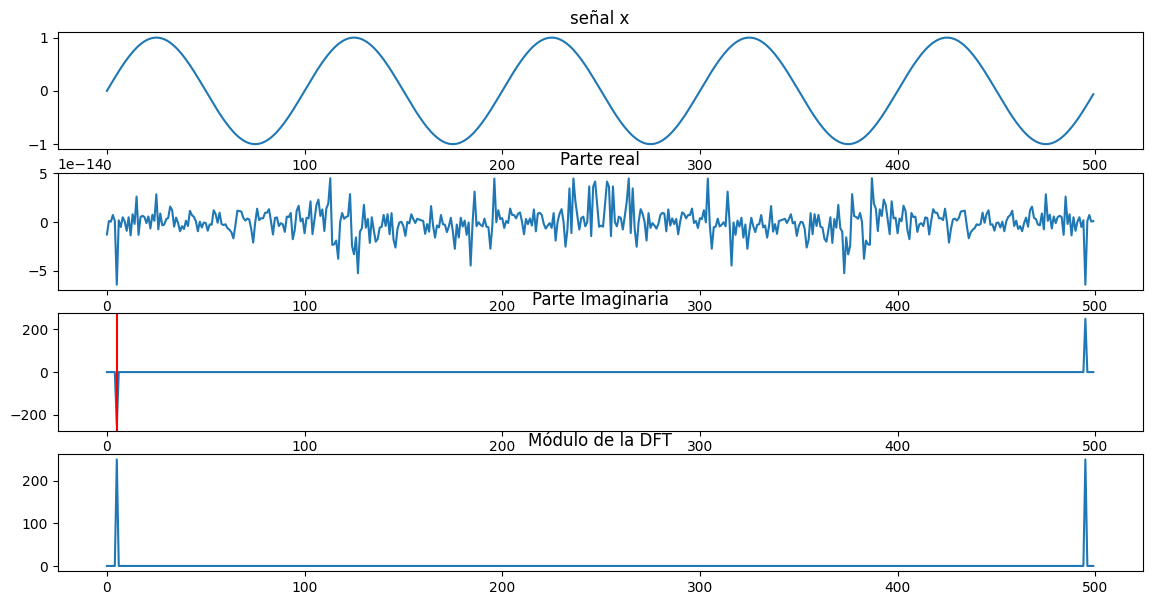

In [13]:
# transformada de la señal x
TFx = fft(x,N)

# mostramos la señal por pantalla
plt.figure(figsize=(14,7))

plt.subplot(411)
plt.plot(x)
plt.xlabel('n')
plt.title('señal x')

plt.subplot(412)
plt.plot(np.real(TFx))
plt.xlabel('n')
plt.title('Parte real')

plt.subplot(413)
plt.plot(np.imag(TFx))
plt.xlabel('n')
plt.title('Parte Imaginaria')
plt.axvline(5, color='red')

plt.subplot(414)

plt.plot(abs(TFx)) #el módulo de la transformada
plt.title('Módulo de la DFT')
plt.show()

<p style="color: red">?? ¿Por qué cuando analizamos un seno se ve en la parte imaginaria el pico y cuando analizamos un coseno <b>se ve al revés?</b></p>

Veamos que ocurre si sumamos las señales $s$ y $x$.

Text(0.5, 1.0, 'señal sx')

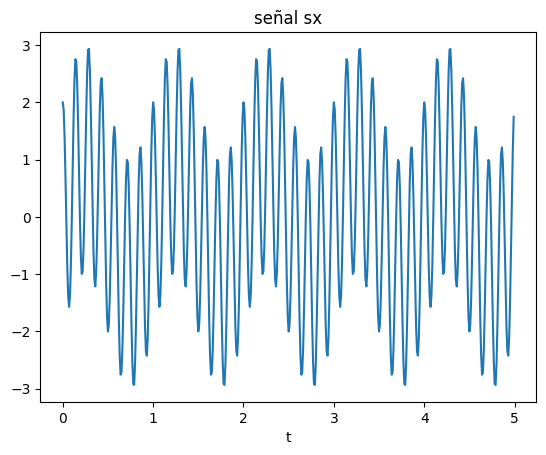

In [15]:
sx= s+x
plt.plot(tn,sx)
plt.xlabel('t')
plt.title('señal sx')

Analicemos las componentes de frecuencia:

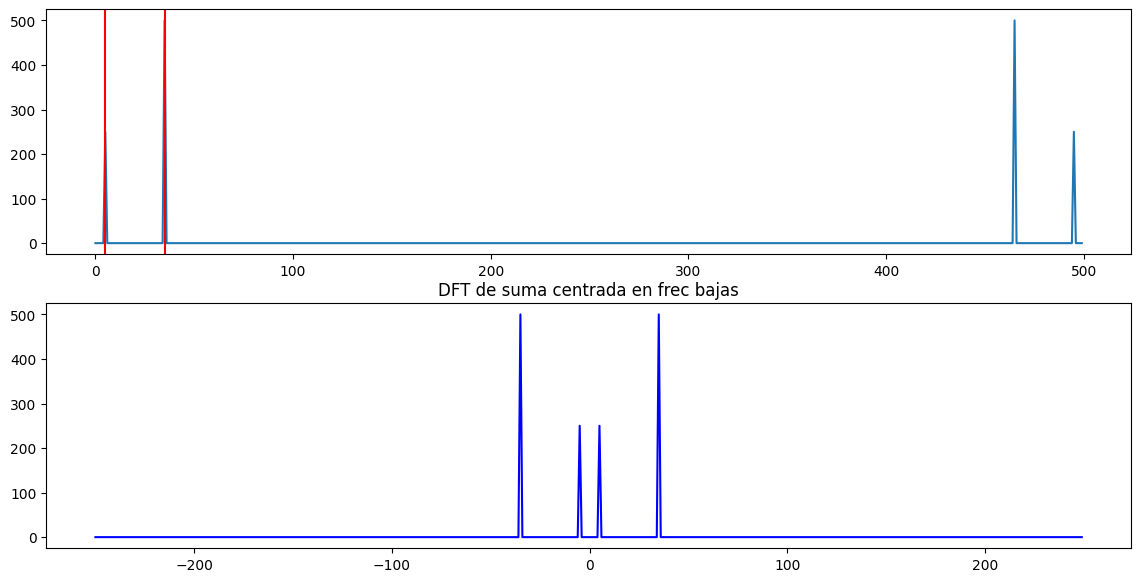

In [18]:
TFsx=fft(sx,N)
plt.figure(figsize=(14,7))
plt.subplot(211)
plt.plot(abs(TFsx)) #el módulo de la transformada
plt.axvline(5, color='red')
plt.axvline(35, color='red')

#Veamos la señal centrada en las frecuencias bajas.
nc = np.arange(-250,250)
plt.subplot(212)
plt.plot(nc, fftshift(abs(TFsx)), color='blue')
plt.title('DFT de suma centrada en frec bajas')
plt.show()

**Analicemos:**
Vemos que tiene dos componentes de frecuencia. Era lo que se esperaba!!

La componente de mayor amplitud es la que tiene el pico en 35  (35 oscilaciones en 5 seg es 7 Hrtz)  y
la de menor amplitud es la del pico en 5 (1 Hertz).

Debemos hacer cuentas porque la DFT **NO** esta en Hertz sino en muestras,

Estamos visualizando DFT[k], relativo a k oscilaciones cada N muestras, con k=0,...N-1. (o bien k=-N//2, ... N//2-1 para la centrada)




Text(0.5, 1.0, 'DFT (ZOOM)')

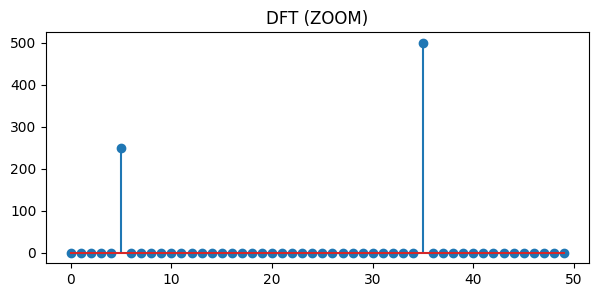

In [20]:
plt.figure(figsize=(7,3))
plt.stem(abs(TFsx)[0:50]) #ZOOM de las primeras 50 muestras del módulo de la transformada
plt.title('DFT (ZOOM)')

# Ej. 2  (DFT.N en Hertz)
Realice el mismo análisis en Hertz y
ubicar en la gráfica la frecuencia de Nyquist.

Pasemos la gráfica a Hertz para poder hacer el análisis en Hertz:
La clave es saber cuanto tiempo significan N muestras,
en nuestro caso N muestras significan T=5 segundos, seria el tiempo total del análisis.

Luego las frecuencias en muestras pasadas a Hertz

In [25]:
T=5 # N muestras son 5 segundos
    # que es lo mismo que la logitud del intervalo l en [s]
# Antes vimos que
# M = fm*l (donde l = 5)
# y así armé mi vector de tiempos discretizados en función de las muestras
# Ahora despejo fm
# M/l = fm (me queda todo en función de la frecuencia)
fH=np.arange(N)/T #Frecuencias pasadas a Hertz
fcH=np.arange(-N//2,N//2)/T #Frecuencias centradas a Hertz

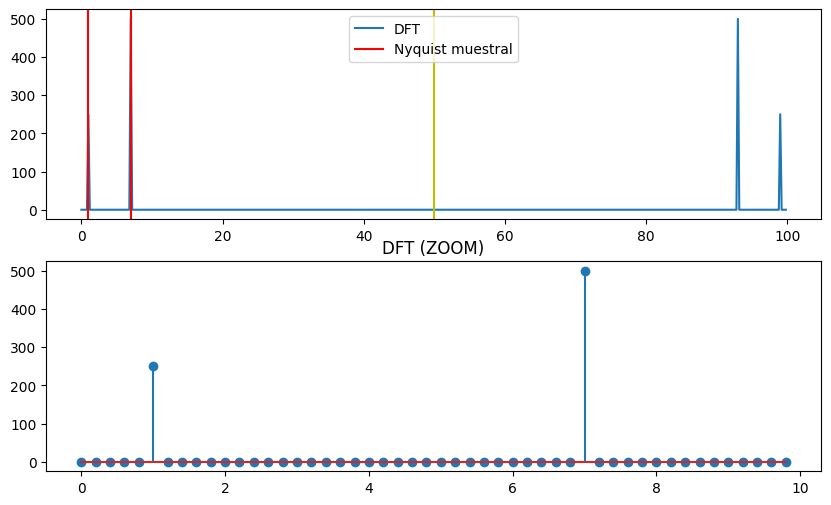

In [26]:
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(fH,abs(TFsx)) #el módulo de la transformada, según frecuencias en Hertz (fH),
plt.axvline(1, color='red')
plt.axvline(7, color='red')

plt.axvline(Nm,c="y") #aca agregamos la Frecuencia de Nyquist muestral,  es la máxima que se puede registrar
plt.legend(["DFT", "Nyquist muestral"]) #frec max de la señal real muestreada, luego se refleja

#ZOOM de las primeras 50 muestras en Hertz del módulo de la transformada
plt.subplot(212)
plt.stem(fH[0:50],abs(TFsx)[0:50])
plt.title('DFT (ZOOM)')
plt.show()


<p style="color:red">?? Por qué las transformadas nos dan espejadas?? Por qué se repiten los valores frecuenciales casi al final??</p>

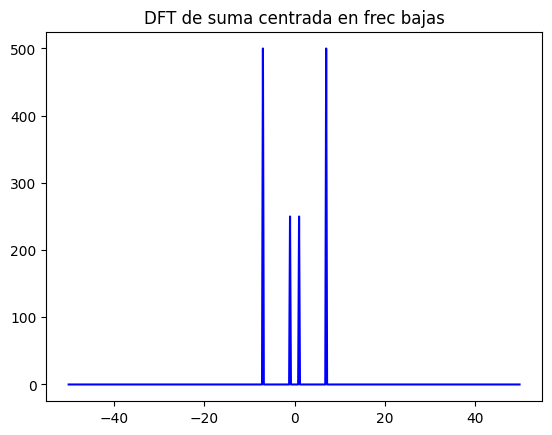

In [ ]:
plt.plot(fcH, fftshift(abs(TFsx)), color='blue')
plt.title('DFT de suma centrada en frec bajas')
plt.show()

# Ej. 3 Convolución

La convolución toma dos funciones, “desliza” una sobre la otra espejada, multiplica los valores de las señales en todos los puntos de superposición, y suma los productos para crear una nueva función


Calcular la convolución de las señales $s$ y $x$.

999
999


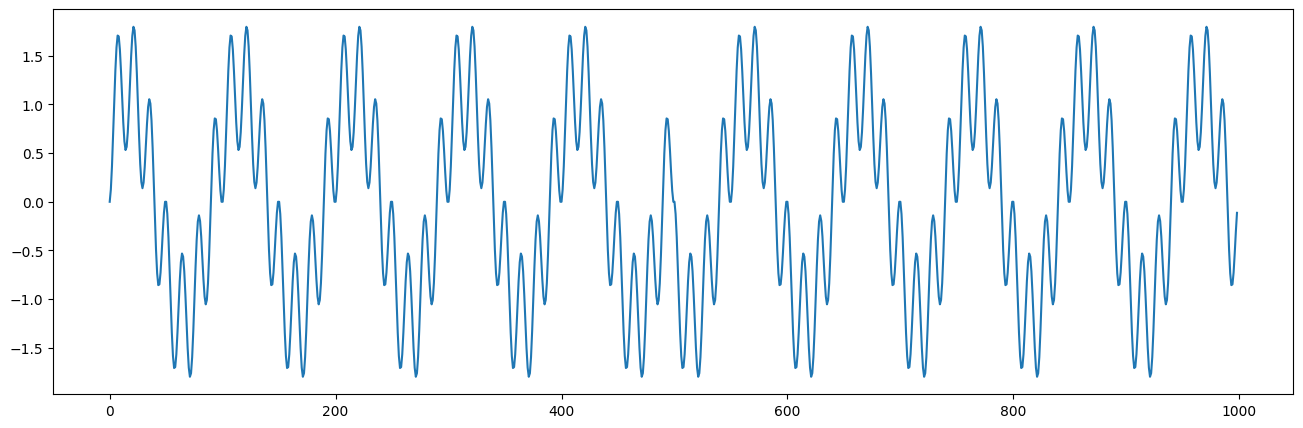

In [ ]:
plt.figure(figsize=(16,5))
scx=signal.convolve(s,x)
plt.plot(scx)
print(len(scx))
print(len(s) + len(x)-1)

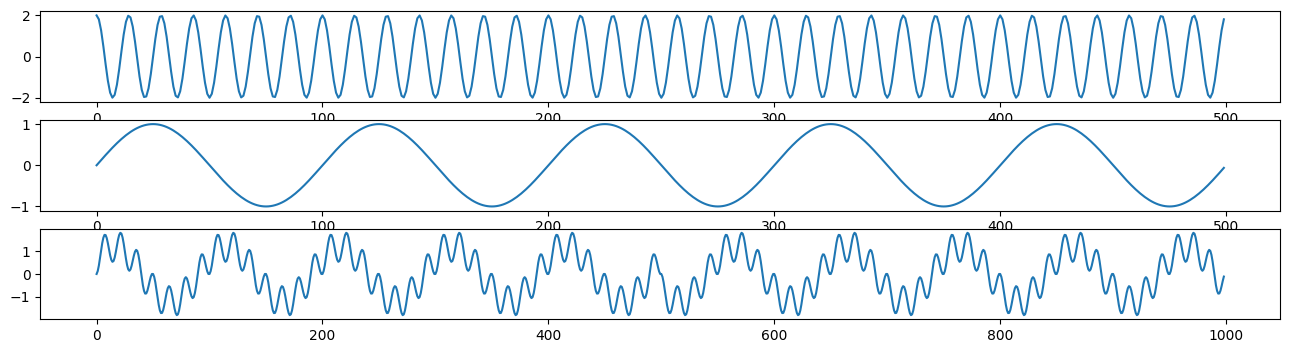

In [ ]:
plt.figure(figsize=(16,4))
#completar
plt.subplot(311)
plt.plot(s)
plt.subplot(312)
plt.plot(x)
plt.subplot(313)
plt.plot(scx)

# Ej.4 (DFT y conv)
Discretizando la señal
$x_3(t)=3 + 5\cos\left(4\pi t\right) + \cos\left(50 \pi t\right)$,  con 100 muestras en $[0,1)$, se obtiene la señal discreta:

$x_3[n]=3 + 5\cos\left(4\pi\frac{n}{100}\right) + \cos\left(50 \pi\frac{n}{100}\right)$  para $n=0$, $\dots$, 99

 a) Realice un análisis en frecuencia de la señal $x_3$ utilizando DFT.N, con N=100.

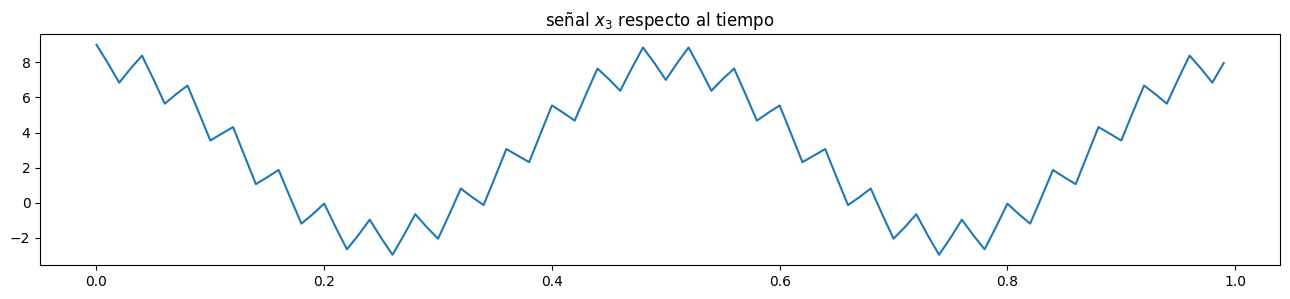

In [28]:
N=100
Fm = 100/1 # 100 muestras sobre l = 1 =>
tn=np.linspace(0,1,100, endpoint=False)
x3= 3 + 5*np.cos(4*np.pi*tn) + np.cos(50*np.pi*tn)
plt.figure(figsize=(16,3))
plt.plot(tn, x3), plt.title('señal $x_3$ respecto al tiempo')
plt.show()


[]

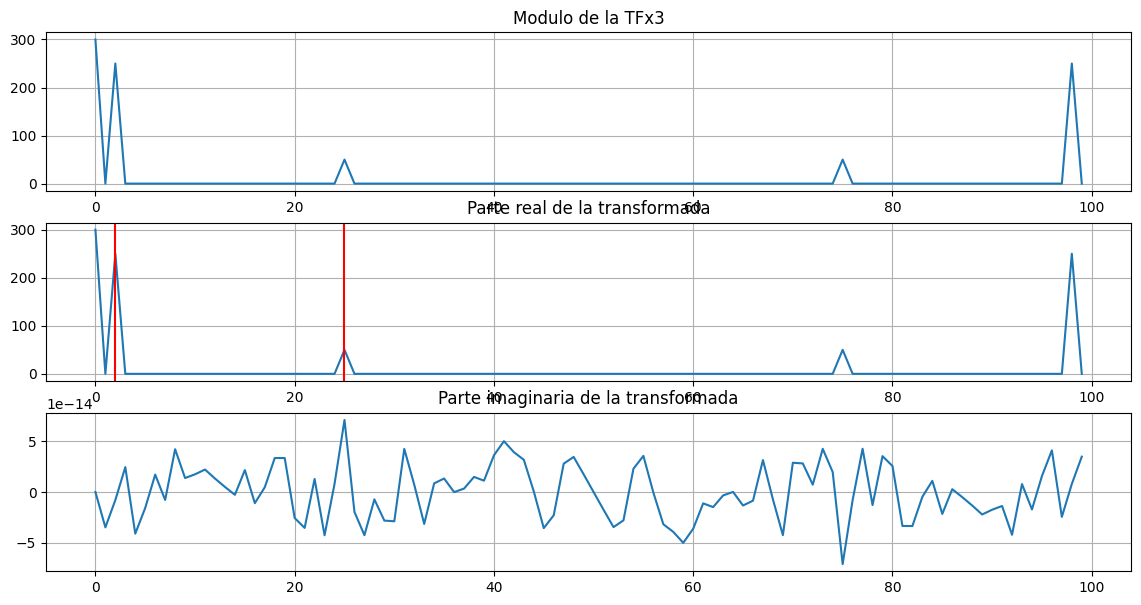

In [33]:
TFx3 = fft(x3,N)

plt.figure(figsize=(14,7))
plt.subplot(311)
plt.plot(abs(TFx3)) #el módulo de la transformada
plt.title("Modulo de la TFx3")
plt.grid()

plt.subplot(312)
plt.plot(np.real(TFx3))
plt.axvline(2, color='red')
plt.axvline(25, color='red')
plt.title("Parte real de la transformada")
plt.grid()

plt.subplot(313)
plt.plot(np.imag(TFx3))
plt.title("Parte imaginaria de la transformada")
plt.grid()

plt.plot()

<p style="color:red">Qué es ese pico que se ve que empieza a caer en 0 en el módulo y en la parte real de la transformada??</p>

**Análisis frecuencial**

En la señal $x_3$ se sabe que está conformada por 2 señales coseno, una con una frecuencia $f_1=2[Hz]$ y otra con $f_2=25[Hz]$. 

En la parte imaginaria de la transformada podemos observar un pequeño "ruido", que podemos omitir del análsis dado su tamaño en comparación con las señales.

## b)

**¿Cuántas componentes de frecuencia tienen la señal?**

Se observan dos componentes frecuenciales como se mencionó anteriormente, uno de $2[Hz]$ y otro de $25[Hz]$

**¿Cuál es la frecuencia de Nyquist?**

La frecuencia de Nyquist de muestreo será $N_m = \frac{F_m}{2}$ donde $F_m = 100 \implies N_m = 50$

**¿La DFT? ¿Cómo analizó las componentes de frecuencia? ¿Puede decir algo sobre la amplitud?**

Es decir, estas señales oscilan 2 y 25 veces en 100 muestras, o en 1 segundo. Este comoportamiento lo podemos observar cuando graficamos tanto el módulo como la parte real de la transformada: se observan dos picos, en 2 y en 25 (líneas rojas verticales). Estos picos son de diferente amplitud, porque los cosenos tienen diferente amplitud.


### **Considerando la Transformada de Fourier punto N**

**¿es siempre posible recuperar la señal a partir de la transformada de Fourier?**

Siempre que $M \le N$ se podrá recuperar la señal porque tienen el mismo número de muestras o se realiza zero padding al tener más muestras en tiempo que en el dominio frecuencial. En caso de que se tengan menos muestras en el dominio frecuencial que en el temporal ($M>N$) se tiene un truncamiento y no se puede recuperar la señal.

**¿Se realizó un Zero padding o un truncamiento?**

En este caso se tiene $M = 100$ muestras en el dominio temporal y $N=100$ muestras en el dominio frecuencial => no se realiza ni zero padding ni truncamiento porque coinciden los valores muestreados en ambos dominios

In [34]:
#Recuperemos nuestra señal?
prueba=ifft(fft(x3,100),100)
print(prueba[49])
print(x3[49])

(7.960573506572384+1.3515325979016575e-16j)
7.960573506572382


In [36]:
#Qué sucede si tomamos DFT punto M < N? recuperamos nuestra señal?
prueba2=ifft(fft(x3, 50))
print(prueba2[49])
print(len(prueba2))

(7.960573506572382-5.406130391606633e-16j)
50


## Tarea

---



(a) Considerando la Transformada de Fourier punto N

¿es siempre posible recuperar la señal a partir de la transformada de Fourier?

¿Se realizó un Zero padding o un truncamiento?

Y si N>M o N< M?
   
 Agregar graficos en las verificaciones

Justifique aquí sus respuestas.

In [ ]:
#Verifique aquí su respuesta

## b) Convolución Circular

Relice la convolución circular de  las señales discretas $x_3$ y $x_4$, donde:

$x_4[n]=1/5$ , para  $n=0,\dots, 4$.



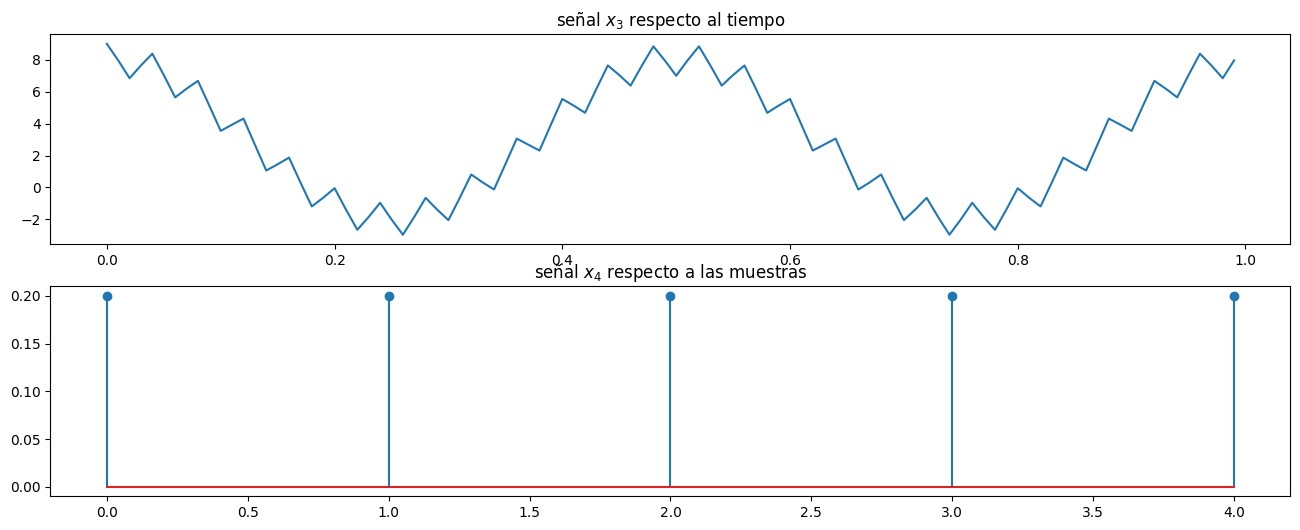

In [ ]:
#Ayudamos un poquito

x4=np.ones(5)/5
plt.figure(figsize=(16,6))
plt.subplot(211), plt.plot(tn, x3), plt.title('señal $x_3$ respecto al tiempo')
plt.subplot(212), plt.stem(x4), plt.title('señal $x_4$ respecto a las muestras')
plt.show()

#Importante:#

Para calcular la convolución circular usaremos el siguiente procedimiento:

In [ ]:
#Convolución circular de N puntos de las señales f y g
#de forma "manual",  definiendo la función:
import numpy as np

def conv_circ_N(f,g, N):
  N=int(N)
  f1=np.zeros(N)
  g1=np.zeros(N)
  h=np.zeros(N)
  Mf=len(f)
  if Mf<= N: f1[0:Mf]=f
  else:   f1=f[0:N]
  Mg=len(g)
  if Mg<= N: g1[0:Mg]=g
  else:   g1=g[0:N]
  for m in range(N):
    for n in range(N):
      h[m] += f1[n]*g1[m - n]   # sumatoria
  return h

Realizamos la convolución circular entre $x_3$ y $x_4$.

longitudes: 100 5 100


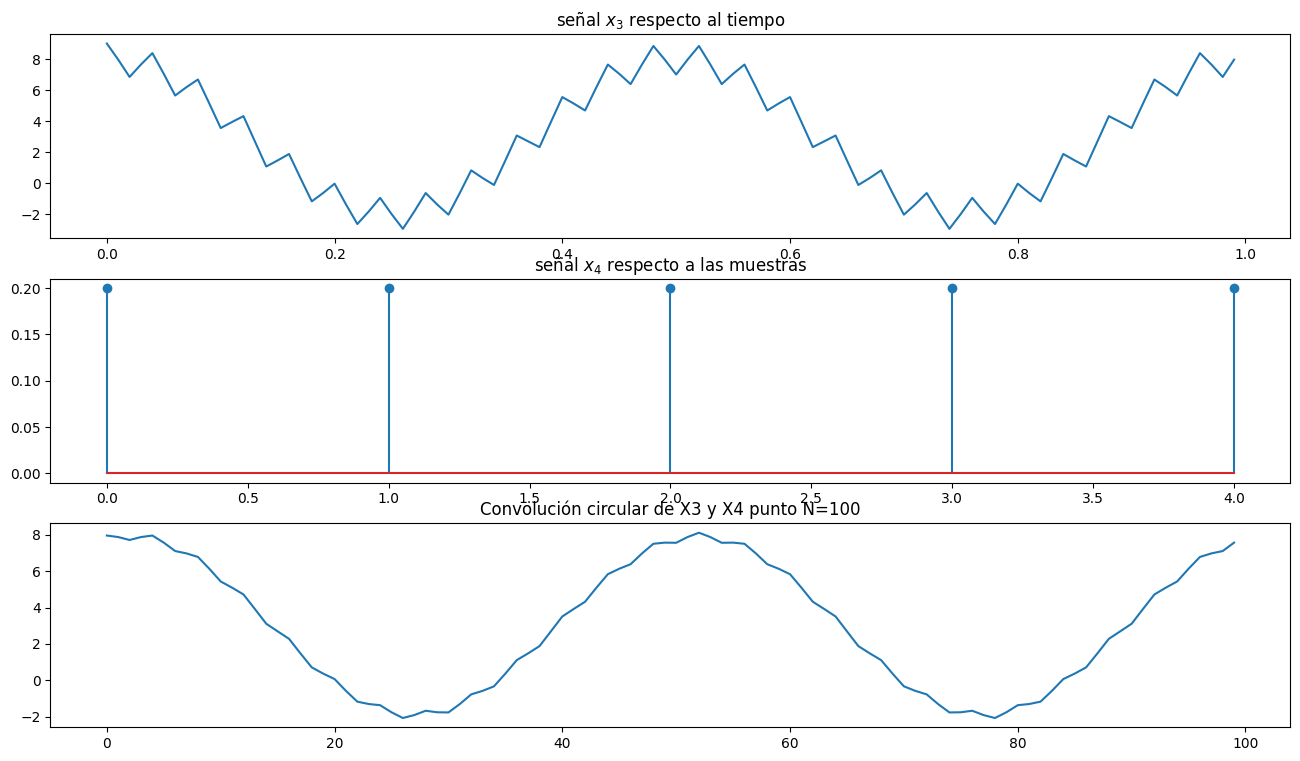

In [ ]:
N=100
#Realizar la convolución circular punto N de estas dos señales y graficar
x34c= conv_circ_N(x3,x4,N)
print("longitudes:", len(x3), len(x4), len(x34c))

plt.figure(figsize=(16,9))
plt.subplot(311), plt.plot(tn, x3), plt.title('señal $x_3$ respecto al tiempo')
plt.subplot(312), plt.stem(x4), plt.title('señal $x_4$ respecto a las muestras')
plt.subplot(313),plt.plot(x34c)
plt.title('Convolución circular de X3 y X4 punto N=100')
plt.show()

¿Qué observa en la señal resultando de hacer la convolución circular de $x_3 * x_4$?

**Respuesta:**
Note el efecto de suavizado que se ha logrado al realizar la convolución con $x_4$. La señal $x_4$ actúa como un filtro de promediado, suavizado (pasa bajo) para la señal $x_3$.

## c)
**Realice** la DFT.N con N=100 de  $x_4$. Verifique que $x_4$ está funcionando como filtro pasa bajo de la señal $x_3$ cuando realiza la convolucion. (ayuda: recordar el Teorema de la convolucion.)

¿Cómo se relacionan la convolución lineal y la circular? Justifique con un ejemplo su respuesta.

**Para que la convolución circular punto N coincida con la lineal se debe cumplir que $N \geq len(x)+len(y)-1$**

Longitud de la señal resultado de $x * y$ es $len(x)+len(y)-1$.

¿Cómo se relaciona la transformada de Fourier con la convolución?

**Teorema:** La transformada de Fourier de la convolución punto N de dos señales es igual al producto de las transformadas punto N de las señales dadas.

Verificar con las señales dadas anteriormente.

¿Cuándo no es posible? Ejemplo

Justifique aquí su respuesta:


In [ ]:
#